In [2]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
# from matplotlib.widgets import Slider
# import pingouin as pg
# import visualise_functions as vf

In [3]:
def visualise_byprotocol(subno, protocol, space='native', histon=True, refon=False, pwion=False, csfcalibon=False):

    imsize = 3
    cmap = 'hot'
    colors = ['tab:blue','tab:orange','tab:red','tab:green']
    if isinstance(subno,int): subno = [subno]
    
    for sub in subno:

        filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/sub{:02d}'.format(sub)

        if protocol=='GE-3D':
            # Figure 1: Reference image (Scanner generated CBF, or structural image, or standard image), if refon=True
            if refon: figure_ref = plt.figure(figsize=[4*imsize,imsize],dpi=100)
            # Figure 2: oxford_asl processed image
            figure_img = plt.figure(figsize=[4*imsize,imsize],dpi=100) 
            # Figure 3: Histogram of CBF, if histon=True
            figure_hist = plt.figure(figsize=[2*imsize,imsize],dpi=100)
            if histon: ax_hist = figure_hist.add_subplot()
            j=0
            for session in ['s1','s2']:
                for state in ['REST','TASK']:
                    j+=1
                    cbf = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed.nii.gz').get_fdata()
                    mask = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed_mask.nii.gz').get_fdata()
                    ax_img = figure_img.add_subplot(1,4,j)
                    img = ax_img.imshow(np.flipud(cbf[:,:,round(cbf.shape[2]/2)].T),cmap=cmap)
                    ax_img.xaxis.set_visible(False); ax_img.yaxis.set_visible(False)
                    ax_img.set_title('sub{:02d}'.format(sub)+' '+protocol+'\n'+session+' '+state+' '+space+' space',fontsize=10)
                    figure_img.colorbar(img,ax=ax_img,shrink=0.8)
                    if histon: 
                        ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100)
                        ax_hist.plot(xdata[1:],ydata,label=session+' '+state,color=colors[j-1])
                        # ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,histtype='step',label=session+' '+state,color=colors[j-1])
                    if refon:
                        cbf_ref = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/AVG_CBF.nii.gz').get_fdata()
                        ax_ref = figure_ref.add_subplot(1,4,j)
                        ref = ax_ref.imshow(np.flipud(cbf_ref[:,:,round(cbf_ref.shape[2]/2)].T),cmap=cmap)
                        ax_ref.xaxis.set_visible(False); ax_ref.yaxis.set_visible(False)
                        ax_ref.set_title('sub{:02d}'.format(sub)+' '+protocol+'\n'+session+' '+state+' ref-image',fontsize=10)
                        figure_ref.colorbar(ref,ax=ax_ref,shrink=0.8)
            if histon: 
                ax_hist.legend()
                ax_hist.grid(alpha=0.5)
                ax_hist.set_xlabel('CBF (ml/100g/min)')
                ax_hist.set_ylabel('Number of voxels')
                ax_hist.set_title('Histogram of sub{:02d}'.format(sub)+' '+protocol+' '+space+' space',fontsize=10)

        else:
            struct_img = '/analysis/T1.anat/T1_biascorr_brain.nii.gz'
            std_img = '/analysis/T1.anat/T1_to_MNI_nonlin.nii.gz'
            filename_ref = {'GE-eASLRESTnative':'/nifti/NOT_DIAGNOSTIC_(CBF)_eASL_7_delays_real.nii.gz', 'GE-eASLTASKnative':'/nifti/NOT_DIAGNOSTIC_(CBF)_eASL_7_delays_ACT_real.nii.gz', 
                            'GE-eASLRESTstruct':struct_img, 'GE-eASLTASKstruct':struct_img, 'GE-eASLRESTstd':std_img, 'GE-eASLTASKstd':std_img, 
                            'Ing-2DRESTnative':'/nifti/2dREST_PROD_pCASL-nonorm_real.nii.gz','Ing-2DTASKnative':'/nifti/2DACT_PROD_pCASL-nonorm_real.nii.gz', 
                            'Ing-2DRESTstruct':struct_img, 'Ing-2DTASKstruct':struct_img, 'Ing-2DRESTstd':std_img, 'Ing-2DTASKstd':std_img, 
                            'Ing-3DRESTnative':'/nifti/REST_PROD_3D_pCASL_6mm_noNorm_real.nii.gz', 'Ing-3DTASKnative':'/nifti/ACT_PROD_3D_pCASL_6mm_noNorm_real.nii.gz', 
                            'Ing-3DRESTstruct':struct_img, 'Ing-3DTASKstruct':struct_img, 'Ing-3DRESTstd':std_img, 'Ing-3DTASKstd':std_img}
            if protocol=='GE-eASL': scanner='ge'; type='eASL'
            elif protocol=='Ing-2D': scanner='ing'; type='2D'
            elif protocol=='Ing-3D': scanner='ing'; type='3D'
            else: ValueError('Protocol name does not exist.')
            struct_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/T1_biascorr_brain_mask.nii.gz').get_fdata()
            std_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/MNI152_T1_2mm_brain_mask_dil1.nii.gz').get_fdata()
            # Figure 1: Reference image (Scanner generated CBF, or structural image, or standard image), if refon=True
            if refon: figure_ref = plt.figure(figsize=[4*imsize,imsize],dpi=100)
            # Figure 2: Perfusion weighted image, if pwion=True
            if pwion: figure_pwi = plt.figure(figsize=[4*imsize,imsize],dpi=100)
            # Figure 3: oxford_asl processed image (voxelwise-calibrated CBF)
            figure_img = plt.figure(figsize=[4*imsize,2*imsize],dpi=100) 
            # Figure 4: CSF-calibrated CBF, if csfcalibon=True
            if csfcalibon: figure_csfcalib = plt.figure(figsize=[4*imsize,2*imsize],dpi=100)
            # Figure 5: Histogram of CBF, if histon=True
            if histon: figure_hist = plt.figure(figsize=[4*imsize,imsize],dpi=100)
            j=0
            for pvc in ['nopvc','pvc']:
                if histon: ax_hist = figure_hist.add_subplot(1,2,j//4+1)
                for session in ['s1','s2']:
                    for state in ['REST','TASK']:
                        j+=1
                        if pwion: cbf_pwi = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/perfusion.nii.gz').get_fdata()
                        if pvc=='nopvc': cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
                        elif pvc=='pvc': cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
                        if space=='native': mask = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/mask.nii.gz').get_fdata()
                        elif space=='struct': mask = struct_mask
                        elif space=='std': mask = std_mask
                        ax_img = figure_img.add_subplot(2,4,j)
                        img = ax_img.imshow(np.flipud(cbf[:,:,round(cbf.shape[2]/2)].T),cmap=cmap)
                        ax_img.xaxis.set_visible(False); ax_img.yaxis.set_visible(False)
                        ax_img.set_title('sub{:02d}'.format(sub)+' '+protocol+' '+pvc+'\n'+session+' '+state+' '+space+' space',fontsize=10)
                        figure_img.colorbar(img,ax=ax_img,shrink=0.8)
                        if csfcalibon:
                            if pvc=='nopvc': cbf_csfcalib = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/perfusion_calib_csf.nii.gz').get_fdata()
                            elif pvc=='pvc': cbf_csfcalib = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/pvcorr/perfusion_calib_csf.nii.gz').get_fdata()
                            ax_csfcalib = figure_csfcalib.add_subplot(2,4,j)
                            csfcalib = ax_csfcalib.imshow(np.flipud(cbf_csfcalib[:,:,round(cbf_csfcalib.shape[2]/2)].T),cmap=cmap)
                            ax_csfcalib.xaxis.set_visible(False); ax_csfcalib.yaxis.set_visible(False)
                            ax_csfcalib.set_title('sub{:02d}'.format(sub)+' '+protocol+' '+pvc+'\n'+session+' '+state+' '+space+' space CSF-calib',fontsize=10)
                            figure_csfcalib.colorbar(csfcalib,ax=ax_csfcalib,shrink=0.8)
                        if histon: 
                            ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200))
                            ax_hist.plot(xdata[1:],ydata,label=session+'_'+state,color=colors[(j-1)%4])
                            # ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200),histtype='step',label=session+'_'+state,color=colors[(j-1)%4])
                            if csfcalibon:
                                ydata,xdata = np.histogram(cbf_csfcalib.flatten()[mask.flatten()>0],bins=100,range=(1,200))
                                ax_hist.plot(xdata[1:],ydata,linestyle='--',label=session+'_'+state+'_CSF-calib',color=colors[(j-1)%4])
                                # ax_hist.hist(cbf_csfcalib.flatten()[mask.flatten()>0],bins=100,range=(1,200),histtype='step',label=session+'_'+state+'_CSF-calib',color=colors[(j-1)%4])
                        if refon:
                            if pvc=='pvc': continue
                            cbf_ref = nib.load(filename_prefix+'/'+scanner+'/'+session+filename_ref[protocol+state+space]).get_fdata()
                            if space=='native':
                                ax_ref = figure_ref.add_subplot(1,4,j)
                                ref = ax_ref.imshow(np.flipud(cbf_ref[:,:,round(cbf_ref.shape[2]/2)].T),cmap='hot')
                            else:
                                if j>1: continue
                                figure_ref.set_size_inches((imsize,imsize))
                                ax_ref = figure_ref.add_subplot()
                                ref = ax_ref.imshow(np.flipud(cbf_ref[:,:,round(cbf_ref.shape[2]/2)].T),cmap='hot')
                            ax_ref.xaxis.set_visible(False); ax_ref.yaxis.set_visible(False)
                            ax_ref.set_title('sub{:02d}'.format(sub)+' '+protocol+'\n'+session+' '+state+' ref-image', fontsize=10)
                            figure_ref.colorbar(ref,ax=ax_ref,shrink=0.8)
                        if pwion:
                            if pvc=='pvc': continue
                            cbf_pwi = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/perfusion.nii.gz').get_fdata()
                            if space=='native':
                                ax_pwi = figure_pwi.add_subplot(1,4,j)
                                pwi = ax_pwi.imshow(np.flipud(cbf_pwi[:,:,round(cbf_pwi.shape[2]/2)].T),cmap='hot')
                            ax_pwi.xaxis.set_visible(False); ax_pwi.yaxis.set_visible(False)
                            ax_pwi.set_title('sub{:02d}'.format(sub)+' '+protocol+'\n'+session+' '+state+' pw-image',fontsize=10)
                            figure_pwi.colorbar(pwi,ax=ax_pwi,shrink=0.8)
                if histon: 
                    ax_hist.legend()
                    ax_hist.grid(alpha=0.5)
                    ax_hist.set_xlim([0,200])
                    ax_hist.set_xlabel('CBF (ml/100g/min)')
                    ax_hist.set_ylabel('Number of voxels')
                    ax_hist.set_title('Histogram of sub{:02d}'.format(sub)+' '+protocol+' '+pvc+' '+space+' space')
                
    return None

## CBF Estimation

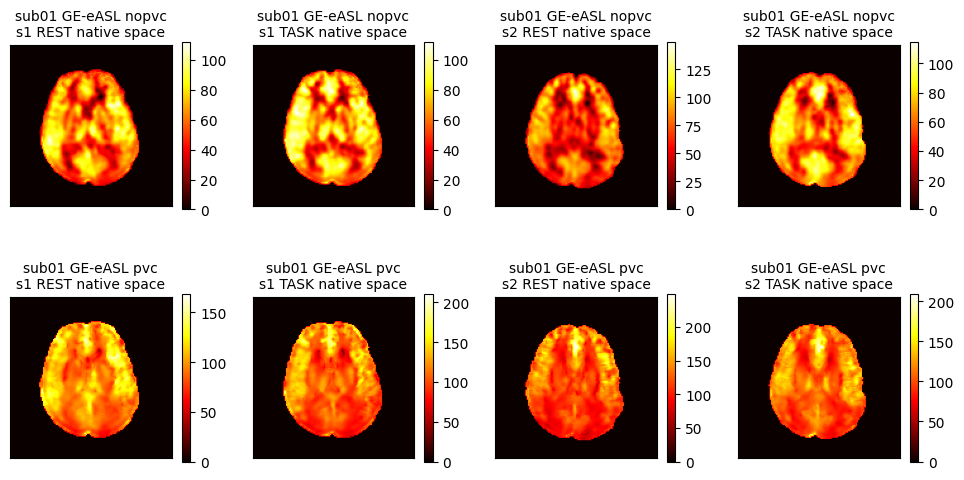

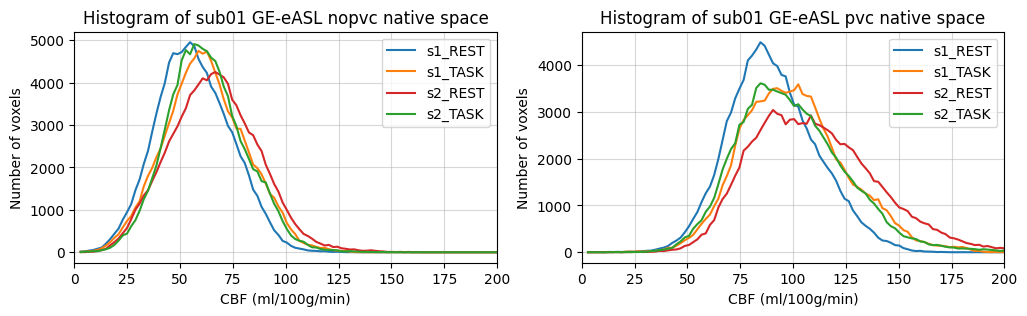

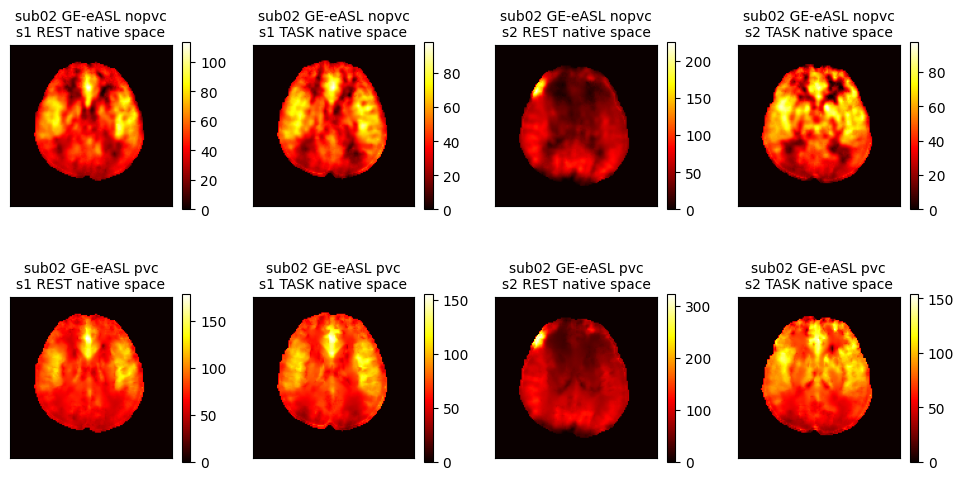

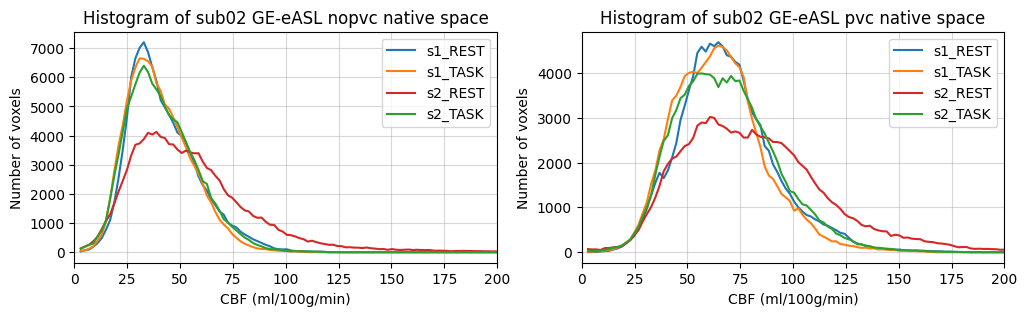

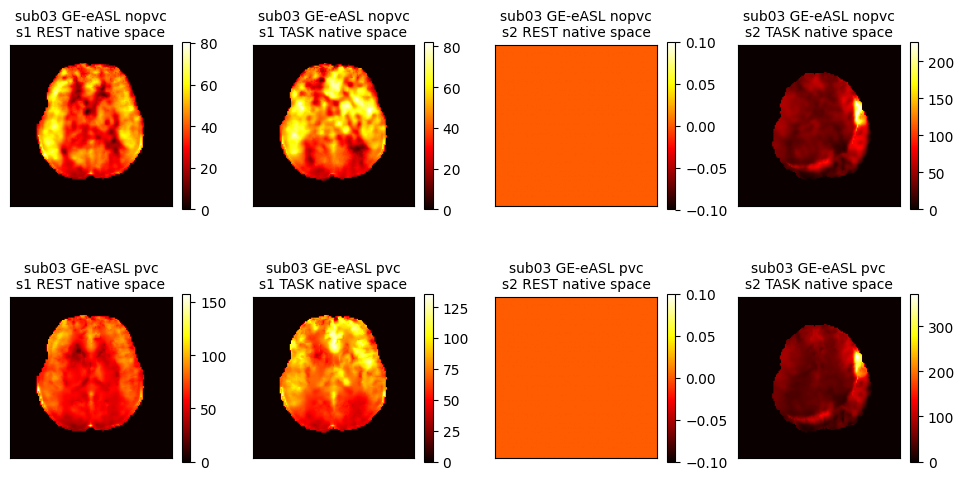

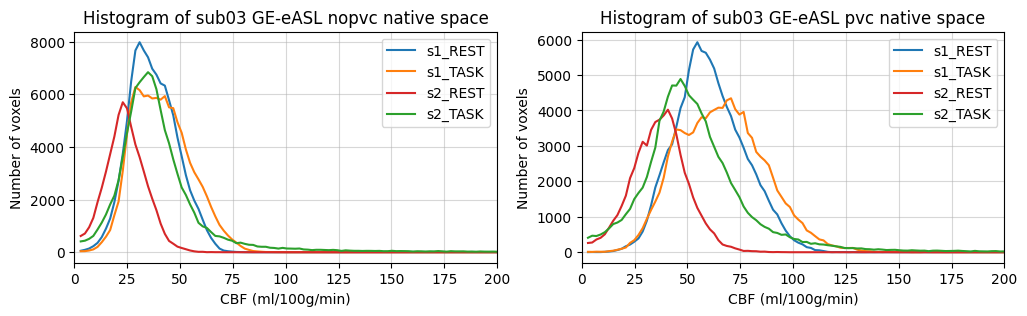

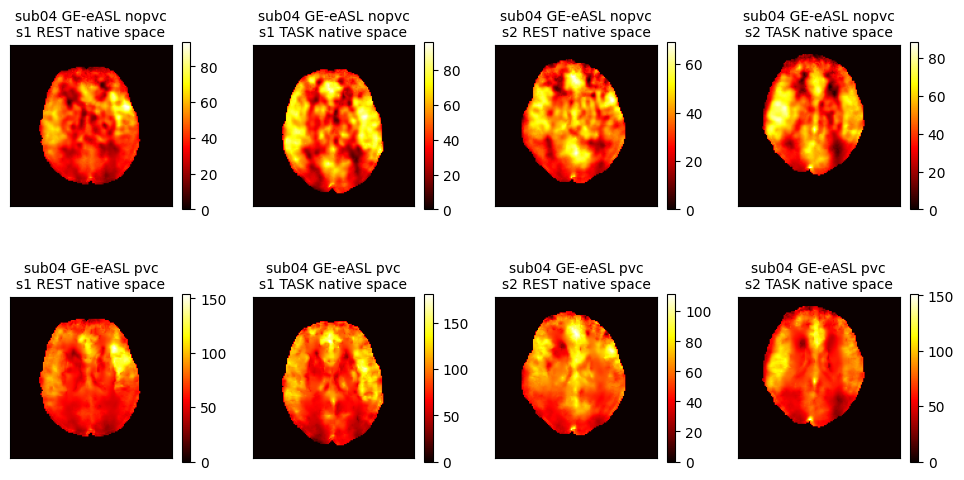

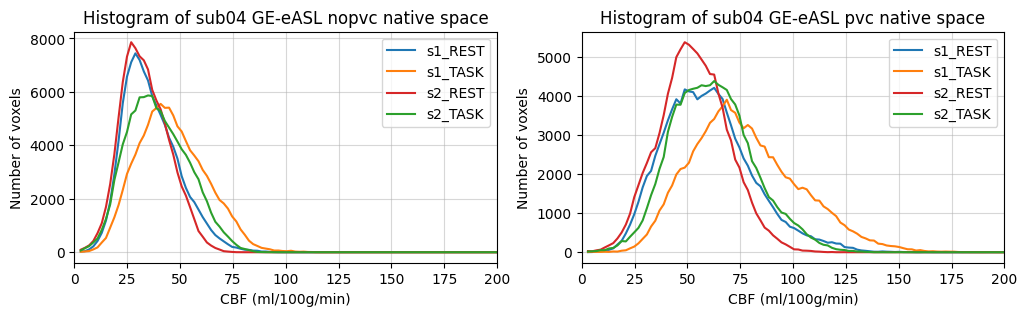

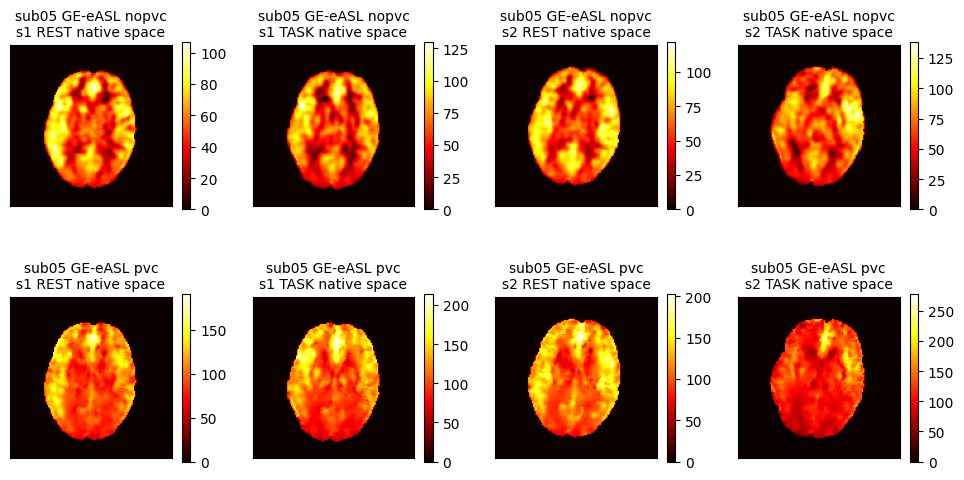

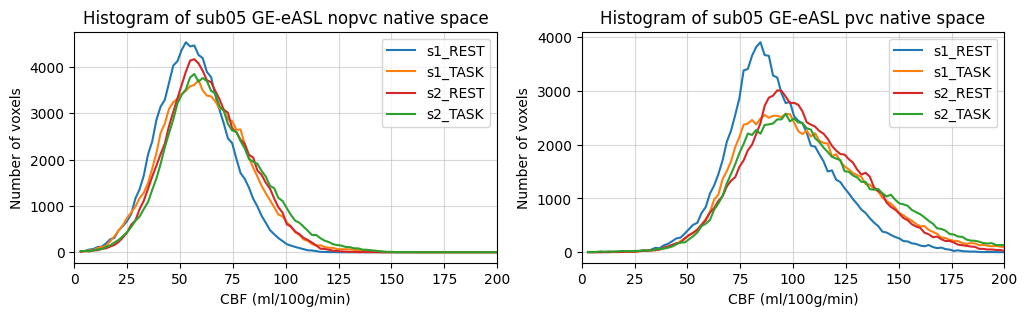

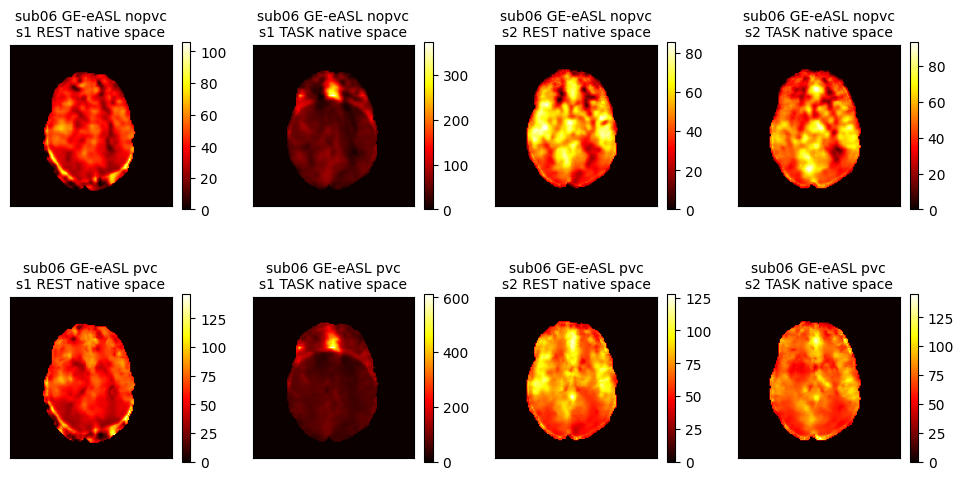

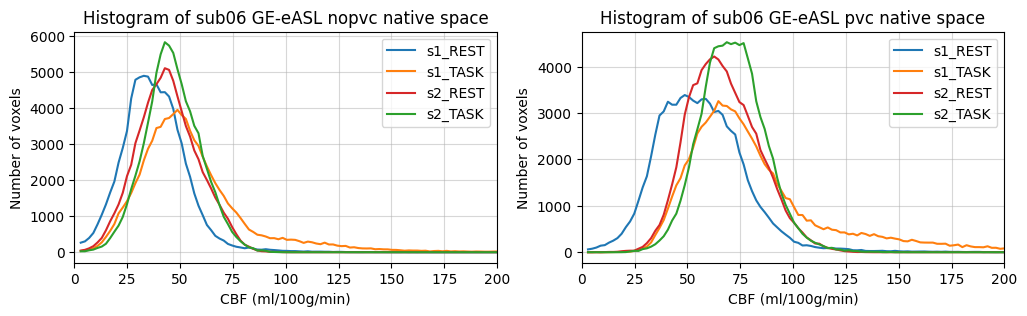

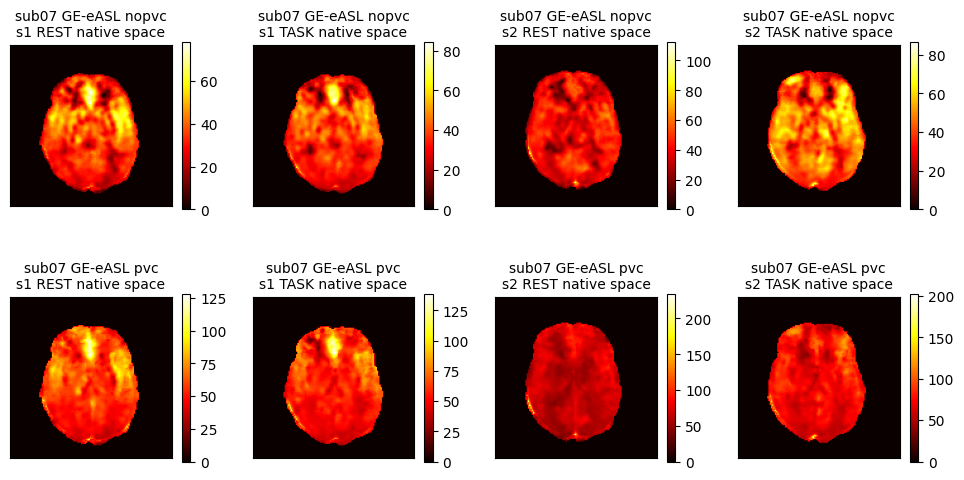

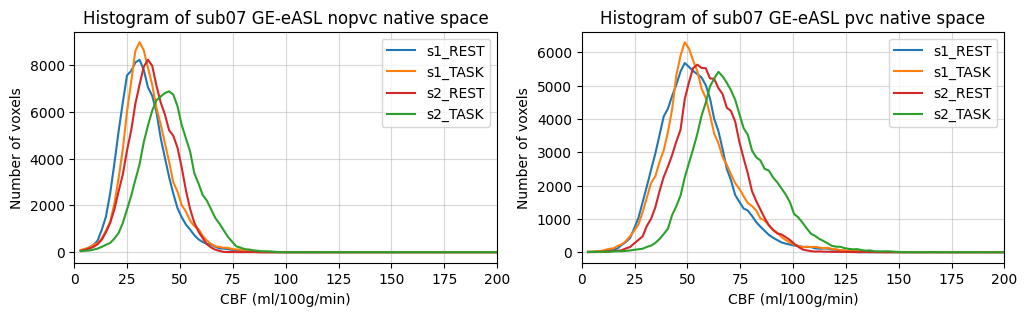

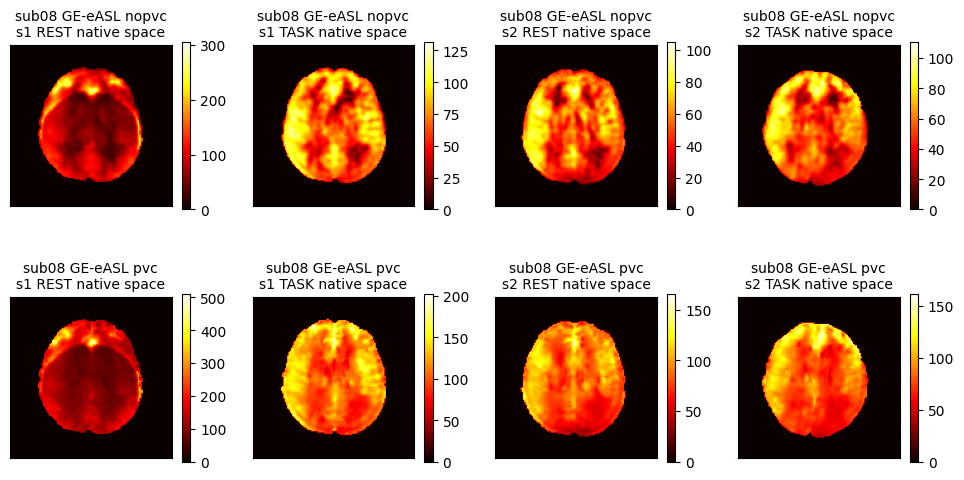

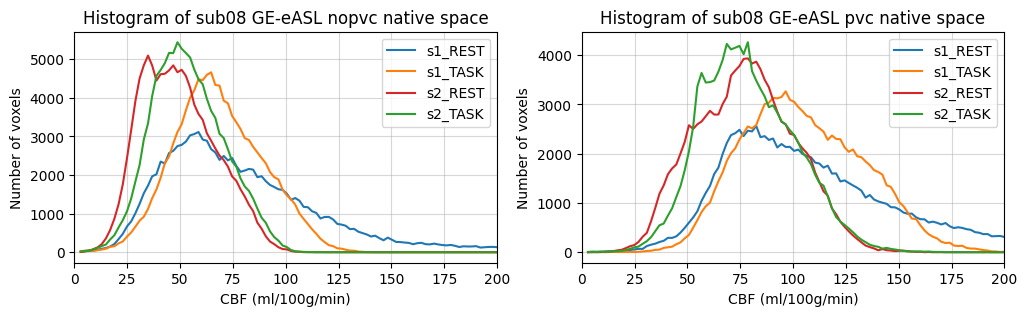

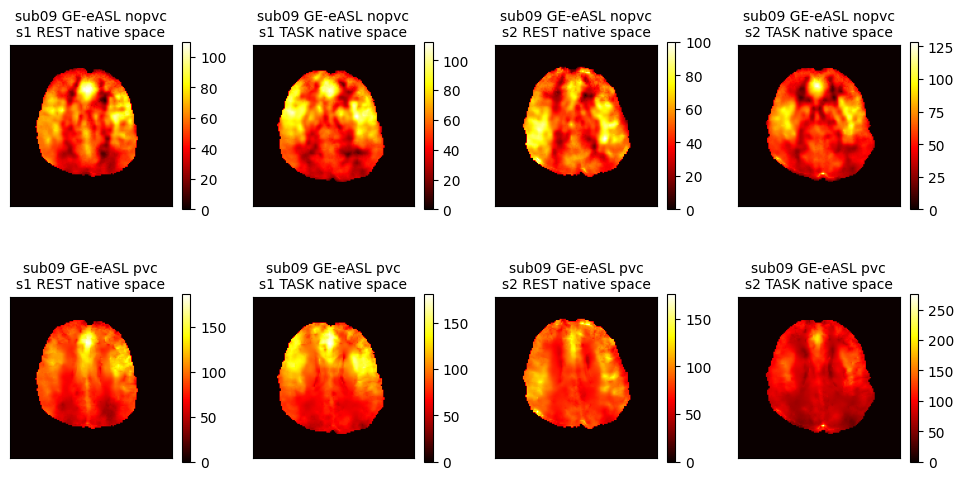

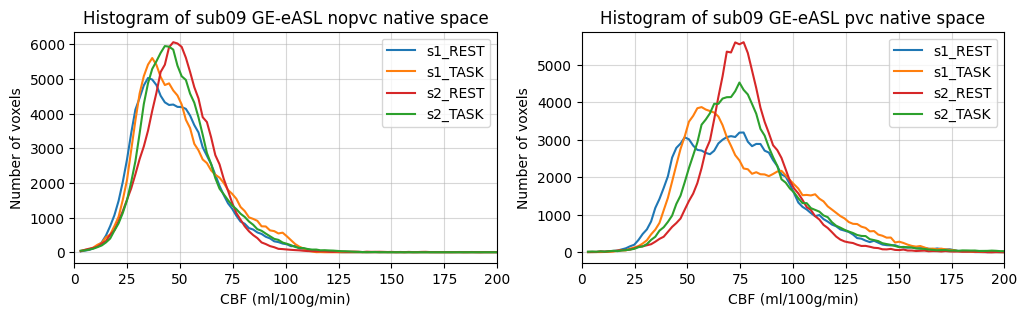

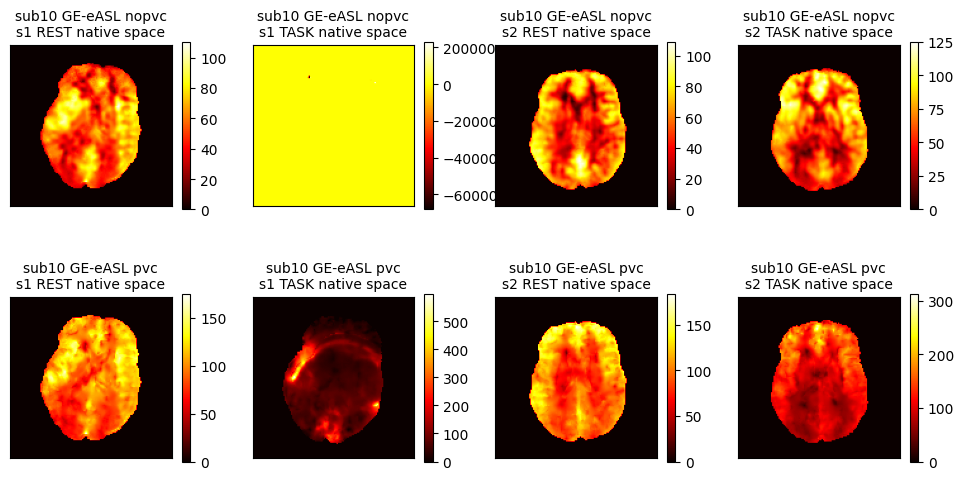

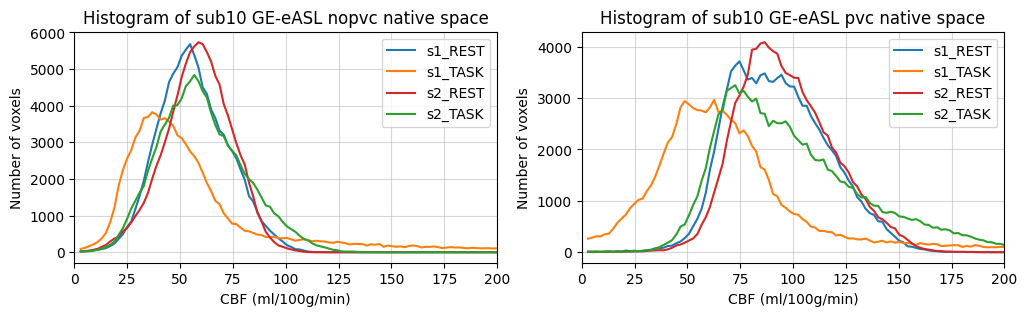

In [4]:
visualise_byprotocol(subno=[1,2,3,4,5,6,7,8,9,10],protocol='GE-eASL',space='native',histon=True,refon=False,pwion=False,csfcalibon=False)

In [ ]:
def visualise_bysubject(subno,protocol='all',space='all',hist=True,refon=False):

    imsize = 3

    colors = ['tab:blue','tab:orange','tab:red','tab:green']
    if protocol=='all': protocol = ['GE-3D','GE-eASL','Ing-2D','Ing-3D']
    if space=='all': space=['native','struct','std']
    for protocol_counter in protocol:
        
        filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/sub{:02d}'.format(subno)

        if protocol_counter=='GE-3D':
            if refon: figure_ref = plt.figure(figsize=[4*imsize,imsize],dpi=100)
            figure_img = plt.figure(figsize=[4*imsize,imsize],dpi=100) 
            figure_hist = plt.figure(figsize=[2*imsize,imsize],dpi=100)
            j=0
            if hist: ax_hist = figure_hist.add_subplot()
            for session in ['s1','s2']:
                for state in ['REST','TASK']:
                    j+=1
                    ax_img = figure_img.add_subplot(1,4,j)
                    cbf = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed.nii.gz').get_fdata()
                    mask = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed_mask.nii.gz').get_fdata()
                    ax_img.imshow(np.flipud(cbf[:,:,round(cbf.shape[2]/2)].T),cmap='Greys_r')
                    ax_img.xaxis.set_visible(False)
                    ax_img.yaxis.set_visible(False)
                    ax_img.set_title('sub{:02d}'.format(subno)+' '+protocol_counter+'\n'+session+' '+state+' native space')
                    if hist: ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,histtype='step',label=session+' '+state,color=colors[j-1])
                    if refon:
                        cbf_ref = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/AVG_CBF.nii.gz').get_fdata()
                        ax_ref = figure_ref.add_subplot(1,4,j)
                        ax_ref.imshow(np.flipud(cbf_ref[:,:,round(cbf_ref.shape[2]/2)].T),cmap='Greys_r')
                        ax_ref.xaxis.set_visible(False)
                        ax_ref.yaxis.set_visible(False)
                        ax_ref.set_title('sub{:02d}'.format(subno)+' '+protocol_counter+'\n'+session+' '+state+' ref-image')
            if hist: 
                ax_hist.legend()
                ax_hist.grid(alpha=0.5)
                ax_hist.set_xlabel('CBF (ml/100g/min)')
                ax_hist.set_ylabel('Number of voxels')
                ax_hist.set_title('Histogram of sub{:02d}'.format(subno)+' '+protocol_counter+' native space')

        else:
            struct_img = '/analysis/T1.anat/T1_biascorr_brain.nii.gz'
            std_img = '/analysis/T1.anat/T1_to_MNI_nonlin.nii.gz'
            filename_ref = {'GE-eASLRESTnative':'/nifti/NOT_DIAGNOSTIC_(CBF)_eASL_7_delays_real.nii.gz', 'GE-eASLTASKnative':'/nifti/NOT_DIAGNOSTIC_(CBF)_eASL_7_delays_ACT_real.nii.gz', 
                            'GE-eASLRESTstruct':struct_img, 'GE-eASLTASKstruct':struct_img, 'GE-eASLRESTstd':std_img, 'GE-eASLTASKstd':std_img, 
                            'Ing-2DRESTnative':'/nifti/2dREST_PROD_pCASL-nonorm_real.nii.gz','Ing-2DTASKnative':'/nifti/2DACT_PROD_pCASL-nonorm_real.nii.gz', 
                            'Ing-2DRESTstruct':struct_img, 'Ing-2DTASKstruct':struct_img, 'Ing-2DRESTstd':std_img, 'Ing-2DTASKstd':std_img, 
                            'Ing-3DRESTnative':'/nifti/REST_PROD_3D_pCASL_6mm_noNorm_real.nii.gz', 'Ing-3DTASKnative':'/nifti/ACT_PROD_3D_pCASL_6mm_noNorm_real.nii.gz', 
                            'Ing-3DRESTstruct':struct_img, 'Ing-3DTASKstruct':struct_img, 'Ing-3DRESTstd':std_img, 'Ing-3DTASKstd':std_img}
            if protocol_counter=='GE-eASL': scanner='ge'; type='eASL'
            elif protocol_counter=='Ing-2D': scanner='ing'; type='2D'
            elif protocol_counter=='Ing-3D': scanner='ing'; type='3D'
            else: ValueError('Protocol name does not exist.')
            struct_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/T1_biascorr_brain_mask.nii.gz').get_fdata()
            std_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/MNI152_T1_2mm_brain_mask_dil1.nii.gz').get_fdata()
            for space_counter in space:
                if refon: figure_ref = plt.figure(figsize=[4*imsize,imsize],dpi=100)
                figure_img = plt.figure(figsize=[4*imsize,2*imsize],dpi=100) 
                figure_hist = plt.figure(figsize=[4*imsize,imsize],dpi=100)
                j=0
                for pvc in ['nopvc','pvc']:
                    if hist: ax_hist = figure_hist.add_subplot(1,2,j//4+1)
                    for session in ['s1','s2']:
                        for state in ['REST','TASK']:
                            j+=1
                            if refon: cbf_ref = nib.load(filename_prefix+'/'+scanner+'/'+session+filename_ref[protocol_counter+state+space_counter]).get_fdata()
                            if pvc=='nopvc': cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space_counter+'_space/perfusion_calib.nii.gz').get_fdata()
                            if pvc=='pvc': cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space_counter+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
                            if space_counter=='native': mask = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space_counter+'_space/mask.nii.gz').get_fdata()
                            elif space_counter=='struct': mask = struct_mask
                            elif space_counter=='std': mask = std_mask
                            ax_img = figure_img.add_subplot(2,4,j)
                            ax_img.imshow(np.flipud(cbf[:,:,round(cbf.shape[2]/2)].T),cmap='Greys_r')
                            ax_img.xaxis.set_visible(False)
                            ax_img.yaxis.set_visible(False)
                            ax_img.set_title('sub{:02d}'.format(subno)+' '+protocol_counter+' '+pvc+'\n'+session+' '+state+' '+space_counter+' space')
                            if hist: ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200),histtype='step',label=session+' '+state,color=colors[(j-1)%4])
                            if refon:
                                if pvc=='pvc': continue
                                cbf_ref = nib.load(filename_prefix+'/'+scanner+'/'+session+filename_ref[protocol_counter+state+space_counter]).get_fdata()
                                if space_counter=='native':
                                    ax_ref = figure_ref.add_subplot(1,4,j)
                                    ax_ref.imshow(np.flipud(cbf_ref[:,:,round(cbf_ref.shape[2]/2)].T),cmap='Greys_r')
                                else:
                                    if j>1: continue
                                    figure_ref.set_size_inches((imsize,imsize))
                                    ax_ref = figure_ref.add_subplot()
                                    ax_ref.imshow(np.flipud(cbf_ref[:,:,round(cbf_ref.shape[2]/2)].T),cmap='Greys_r')
                                ax_ref.xaxis.set_visible(False)
                                ax_ref.yaxis.set_visible(False)
                                ax_ref.set_title('sub{:02d}'.format(subno)+' '+protocol_counter+'\n'+session+' '+state+' ref-image')
                            
                    if hist: 
                        ax_hist.legend()
                        ax_hist.grid(alpha=0.5)
                        ax_hist.set_xlim([0,200])
                        ax_hist.set_xlabel('CBF (ml/100g/min)')
                        ax_hist.set_ylabel('Number of voxels')
                        ax_hist.set_title('Histogram of sub{:02d}'.format(subno)+' '+protocol_counter+' '+pvc+' '+space_counter+' space')
                
    return None

In [ ]:
visualise_bysubject(subno=1,protocol='all',space='all',hist=True,refon=True)

In [13]:
def get_roi_cbf(protocol,omit=[]):
    cbf_data = {}
    protocols_dict = {'GE-3D':'ge_3D', 'GE-eASL':'ge_eASL', 'Ing-2D':'ing_2D', 'Ing-3D':'ing_3D'}
    protocol = protocols_dict[protocol]
    cbf_data['Subject'] = []; cbf_data['Session'] = []
    for sub in np.arange(1,11):
        for session in [1,2]:
            if np.any([index==(sub,session) for index in omit]): continue
            cbf_data['Subject'].append(sub)
            cbf_data['Session'].append(session)
    for pvc in ['nopvc','pvc']:
        if protocol=='ge_3D' and pvc=='pvc': continue
        for state in ['REST','TASK']:
            for region in ['gm','wm','fl','ol','pl','tl']:
                cbf_data[state+'_'+region+'_'+pvc] = []
                if region=='gm': thr=0.9
                elif region=='wm': thr=0.7
                else: thr=0.5
                for sub in np.arange(1,11):
                    for session in [1,2]:
                        if np.any([index==(sub,session) for index in omit]): continue
                        filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/repeatability/results/sub{:02d}'.format(sub)
                        cbf = nib.load(filename_prefix+'/'+protocol+'_s{:01d}'.format(session)+'_'+state+'/cbf_'+region+'_'+pvc+'.nii.gz').get_fdata()
                        mask = nib.load(filename_prefix+'/'+protocol+'_s{:01d}'.format(session)+'_'+state+'/prob_'+region+'.nii.gz').get_fdata()
                        cbf_mean = cbf.flatten()[mask.flatten()>thr].mean()
                        cbf_data[state+'_'+region+'_'+pvc].append(cbf_mean)
    return cbf_data

## Repeatability

<ipython-input-13-687d7c3d022e>:25: RuntimeWarning: Mean of empty slice.
  cbf_mean = cbf.flatten()[mask.flatten()>thr].mean()
/Users/xinzhang/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Subject,Session,REST_gm_nopvc,REST_wm_nopvc,REST_fl_nopvc,REST_ol_nopvc,REST_pl_nopvc,REST_tl_nopvc,TASK_gm_nopvc,TASK_wm_nopvc,TASK_fl_nopvc,TASK_ol_nopvc,TASK_pl_nopvc,TASK_tl_nopvc
0,1,1,229.136370,143.631166,198.883570,348.964578,322.627421,223.793366,242.889730,143.656055,202.355628,348.521393,324.847033,211.908187
1,1,2,208.586120,132.478436,189.152586,305.269682,304.680629,214.335072,219.604900,130.351759,183.455660,310.905917,285.815040,203.789436
2,2,1,200.543407,134.023582,129.551544,NaN,NaN,201.921081,185.229251,133.552504,215.789400,244.140639,327.353199,189.713179
3,2,2,243.032323,156.659942,234.960815,363.831514,409.801265,241.770203,214.142667,134.717253,203.278923,297.222222,344.835690,207.290919
4,3,1,163.427021,110.012033,160.356550,211.612343,277.073624,146.636790,167.833927,106.960165,145.956402,223.881763,264.706894,129.045870
5,3,2,176.750377,117.040972,177.881323,228.929762,287.961719,173.481600,180.274221,112.601816,167.267138,235.781716,269.790991,169.608169
6,4,1,167.677774,103.945808,157.288574,246.392762,269.484930,151.367862,176.324558,106.464964,165.865746,254.834814,271.801595,152.211556
7,4,2,139.803507,89.455750,88.406971,NaN,NaN,101.423222,152.895228,96.519044,99.721889,NaN,NaN,134.549733
8,5,1,174.114562,120.352589,191.102582,263.590612,300.277334,181.576175,201.444684,153.453802,227.494936,321.437993,354.385254,202.692794
9,5,2,247.134481,139.372662,156.503762,237.877671,298.295590,203.527638,236.464841,144.350512,160.654756,218.580928,302.140478,219.663358


,Subject,Session,REST_gm_nopvc,REST_wm_nopvc,REST_fl_nopvc,REST_ol_nopvc,REST_pl_nopvc,REST_tl_nopvc,TASK_gm_nopvc,TASK_wm_nopvc,...,REST_fl_pvc,REST_ol_pvc,REST_pl_pvc,REST_tl_pvc,TASK_gm_pvc,TASK_wm_pvc,TASK_fl_pvc,TASK_ol_pvc,TASK_pl_pvc,TASK_tl_pvc
0,1,1,57.542788,31.726208,56.392895,56.379434,59.553419,52.455944,61.985768,33.827163,...,51.129867,62.126251,57.618333,54.642392,73.973802,35.224720,59.792403,70.124819,60.820085,59.469804
1,1,2,66.775458,35.466341,75.240631,68.195936,65.628789,63.309001,62.022912,34.737648,...,65.536308,73.739716,62.245861,65.186936,72.245011,34.933091,57.421173,68.293205,59.993544,59.683074
2,2,1,37.321276,25.399381,46.486421,32.797246,43.031043,36.886966,38.740621,23.843021,...,43.546575,32.894366,43.217031,38.108071,46.166320,23.086004,40.764247,31.154602,38.166497,33.928265
3,3,1,33.930451,21.254220,38.546872,31.302527,39.539172,35.738250,35.765124,25.029241,...,36.825662,31.985156,39.765961,37.766986,43.999490,26.072998,41.906416,30.956126,41.055582,38.229554
4,4,1,31.282869,21.369594,40.224698,29.440237,35.898871,33.237456,43.607953,24.591137,...,37.991103,30.101759,35.446207,33.530545,50.449376,24.775415,48.530552,45.879483,44.943769,44.237173
5,4,2,28.961107,21.425131,33.154525,29.600135,34.259392,29.469516,36.405989,24.838245,...,30.679069,30.921268,34.081427,30.264058,42.365610,25.858774,34.631381,43.190712,40.741309,33.438528
6,5,1,57.441777,29.220239,61.855224,52.624928,57.001417,56.065620,61.444087,31.131219,...,55.730407,56.345542,57.393506,57.736897,72.364618,30.750082,67.730380,58.779709,61.932465,59.705024
7,5,2,61.894440,32.562423,70.430238,61.482929,70.616951,61.204499,63.327167,34.642071,...,63.424100,66.554426,69.888389,62.776636,72.765424,36.474128,69.637697,63.511014,69.083452,61.525801
8,6,2,45.057655,24.809730,41.496374,38.610822,42.983329,42.704600,47.163848,27.217228,...,38.684176,40.376051,43.381830,45.894327,57.287783,26.593746,39.429372,50.359713,44.953991,48.059911
9,7,1,30.486456,18.288736,35.213480,27.029994,31.122544,31.936597,31.565958,19.935724,...,32.768107,27.381279,30.977335,32.628296,36.945770,19.675562,35.442176,30.347441,33.135141,32.675549


,Subject,Session,REST_gm_nopvc,REST_wm_nopvc,REST_fl_nopvc,REST_ol_nopvc,REST_pl_nopvc,REST_tl_nopvc,TASK_gm_nopvc,TASK_wm_nopvc,...,REST_fl_pvc,REST_ol_pvc,REST_pl_pvc,REST_tl_pvc,TASK_gm_pvc,TASK_wm_pvc,TASK_fl_pvc,TASK_ol_pvc,TASK_pl_pvc,TASK_tl_pvc
0,1,1,48.959688,14.000121,56.296064,46.362624,45.077759,47.418614,46.861949,11.933993,...,52.494224,47.411385,44.492872,48.240692,51.031729,10.427513,49.807110,45.935493,41.510422,43.374415
1,1,2,51.917603,13.595295,53.428578,53.236067,45.493566,45.513677,50.351895,14.120480,...,49.790245,54.670007,44.898982,46.084039,54.124925,12.849628,49.915034,50.525922,44.758596,43.086576
2,2,1,55.143694,13.164258,55.344283,50.537391,50.077043,52.172737,49.093400,12.134008,...,52.942539,50.985011,49.461207,52.195609,52.836738,11.207591,51.622192,46.276418,46.175320,43.519479
3,2,2,48.026086,11.146718,51.383744,42.206478,44.577971,44.964228,45.516273,11.248207,...,48.353167,42.625021,43.956724,45.042479,49.618776,9.975105,45.553086,40.537131,41.241445,40.012462
4,3,1,42.502364,10.680972,46.448364,42.876311,40.663465,39.792157,43.812314,10.923667,...,43.525911,43.767725,40.659511,40.280112,48.291697,9.363348,45.755940,42.939160,41.177839,38.574035
5,3,2,57.105407,12.283671,61.695514,53.084941,54.105922,50.746741,55.953869,12.504831,...,57.784989,53.781978,53.558030,51.425623,60.497028,11.165076,56.014206,54.118128,49.084200,45.493569
6,4,1,44.560560,10.315179,54.982460,38.991350,46.558955,46.698553,54.731032,15.649520,...,51.525906,39.590691,46.301880,46.951919,64.331200,12.801033,51.353477,55.890014,45.909707,57.127327
7,4,2,36.933005,9.015880,40.173394,37.447816,34.322543,37.737133,31.660393,6.643396,...,38.034920,38.194210,34.738001,37.999795,34.071472,5.167143,42.629452,28.696506,33.165728,33.352772
8,5,1,33.639483,9.742277,44.986925,32.896706,40.185694,32.645337,44.667127,11.284374,...,42.884350,33.571945,40.734490,33.452310,47.494004,10.304965,62.762320,44.989568,51.968208,39.682886
9,7,1,47.615096,11.092384,55.201640,48.827901,47.755273,44.735800,46.961194,12.547394,...,51.402690,49.086023,47.564615,45.201247,50.182780,11.753758,53.530491,52.305415,48.313837,43.219185


,Subject,Session,REST_gm_nopvc,REST_wm_nopvc,REST_fl_nopvc,REST_ol_nopvc,REST_pl_nopvc,REST_tl_nopvc,TASK_gm_nopvc,TASK_wm_nopvc,...,REST_fl_pvc,REST_ol_pvc,REST_pl_pvc,REST_tl_pvc,TASK_gm_pvc,TASK_wm_pvc,TASK_fl_pvc,TASK_ol_pvc,TASK_pl_pvc,TASK_tl_pvc
0,1,1,45.528807,15.561653,43.596245,38.885495,42.411748,44.330677,38.839496,13.958088,...,37.374319,39.728063,38.824031,43.642079,40.927483,14.735926,33.748737,38.816813,34.295763,36.392973
1,1,2,35.955486,12.439593,35.710412,35.337034,35.577146,34.741218,37.794919,12.627446,...,31.433320,36.159740,32.899381,34.488115,39.727006,13.299578,32.017099,36.526378,33.083943,34.084232
2,2,1,36.826545,12.241447,36.951400,35.717968,36.201804,39.217063,34.210896,11.629142,...,33.906067,35.843417,34.643309,38.200873,35.555334,12.302849,31.927988,32.549181,32.702024,33.008343
3,2,2,34.142231,10.527488,34.389328,31.577725,34.172967,35.644683,29.283378,8.944219,...,31.895594,32.083549,33.029966,35.064187,30.824772,9.305232,28.888425,26.802326,28.408934,29.398995
4,3,1,31.646257,10.302281,31.508194,30.578985,31.469580,32.636208,33.166861,10.834142,...,29.022464,31.218099,30.706663,32.615758,35.062155,11.368692,31.082553,33.151620,31.435985,32.152675
5,3,2,42.114415,13.288861,40.838252,39.241112,40.116521,42.117062,37.156054,12.602219,...,37.083924,39.783773,38.878648,41.836136,38.768964,13.370457,35.801951,38.529081,36.717826,33.281288
6,4,1,34.383557,10.349575,38.232936,38.328529,38.763597,35.862748,33.154769,11.421812,...,34.184500,38.966160,37.283102,34.894604,35.737288,11.586115,33.671746,35.099390,33.640722,30.482728
7,4,2,26.696717,8.638710,27.557155,30.648412,28.261692,26.846576,25.495516,8.255164,...,25.299117,31.154614,27.477738,26.344124,27.399296,8.401307,25.280296,29.712626,26.405227,25.213275
8,5,1,28.351238,10.382556,34.802719,28.718380,35.245197,30.844096,30.160315,12.753946,...,31.614562,29.212508,34.023935,30.401600,32.385351,13.102224,32.769120,34.883010,35.929264,30.691469
9,5,2,36.271799,13.386167,42.328153,37.582836,42.522678,38.412133,33.681024,14.455821,...,38.067867,38.304579,40.588049,37.518122,34.731653,15.171718,37.434292,38.833414,41.989259,32.072068


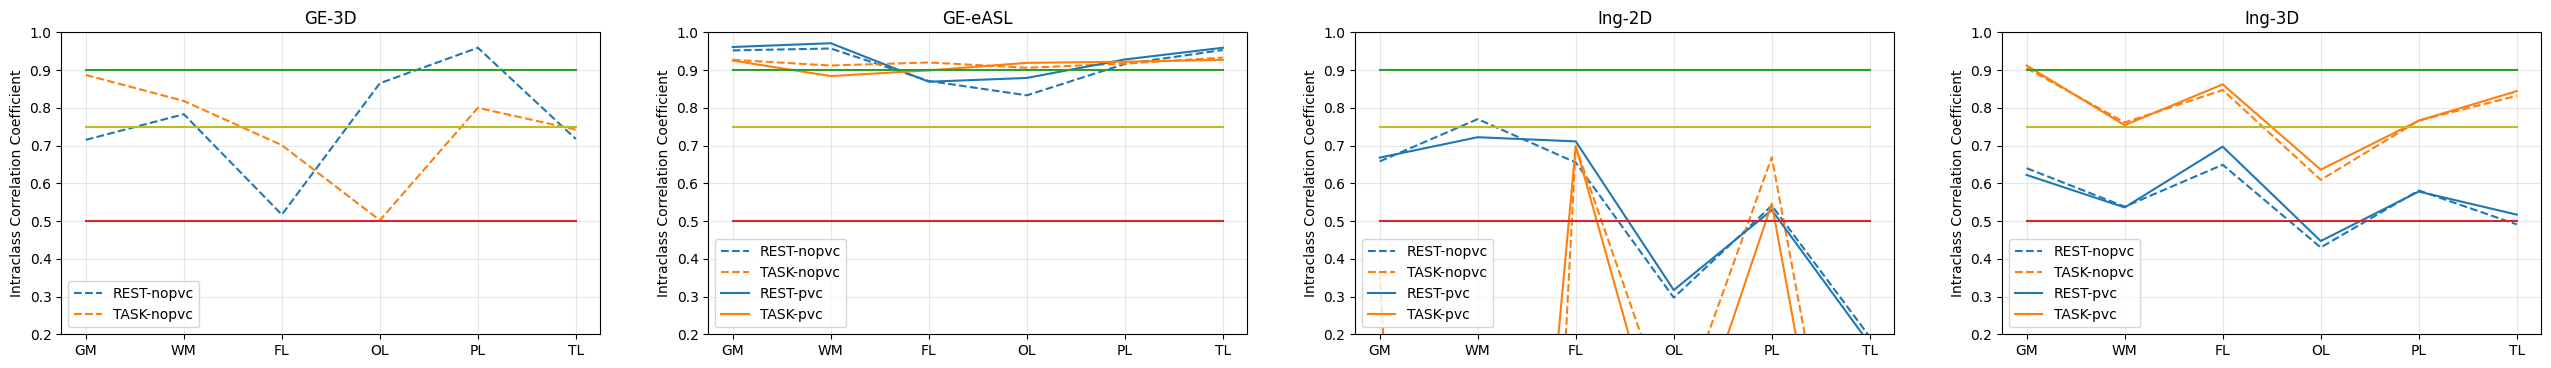

In [14]:
protocols = ['GE-3D','GE-eASL','Ing-2D','Ing-3D']
# protocols = ['GE-eASL']
omit = [[], # for GE-3D
        [(2,2),(3,2),(6,1),(8,1),(10,1)], # for GE-eASL
        [(5,2),(6,1),(6,2)], # for Ing-2D
        []] # for Ing-3D
figure_icc = plt.figure(figsize=[32,4],dpi=100)
which_icc = 3
def set_subplot(ax,protocol):
    ax.plot([0,5],[0.9,0.9],linestyle='-',color='tab:green')
    ax.plot([0,5],[0.75,0.75],linestyle='-',color='tab:olive')
    ax.plot([0,5],[0.5,0.5],linestyle='-',color='tab:red')
    ax.grid(alpha=0.3)
    ax.set_ylim([0.2,1])
    ax.set_xticks(np.arange(6))
    ax.set_xticklabels(['GM','WM','FL','OL','PL','TL'])
    ax.set_ylabel('Intraclass Correlation Coefficient')
    ax.set_title(protocol)
    ax.legend()
    return None

for index, protocol in enumerate(protocols):
    cbf_data = get_roi_cbf(protocol,omit=omit[index])
    df = pd.DataFrame(cbf_data)
    # df.to_csv('/Users/xinzhang/Downloads/mrc_asl_cic/data/repeatability/'+protocol+'.csv')
    display(df)
    ax = figure_icc.add_subplot(1,len(protocols),index+1)
    icc_rest_nopvc = []
    for column in np.arange(2,8):
        icc = pg.intraclass_corr(data=df,targets='Subject',raters='Session',ratings=df.columns[column],nan_policy='omit').round(3)
        icc_rest_nopvc.append(icc['ICC'][which_icc])
    ax.plot(np.arange(6),icc_rest_nopvc,linestyle='--',color='tab:blue',label='REST-nopvc')
    icc_task_nopvc = []
    for column in np.arange(8,14):
        icc = pg.intraclass_corr(data=df,targets='Subject',raters='Session',ratings=df.columns[column],nan_policy='omit').round(3)
        icc_task_nopvc.append(icc['ICC'][which_icc])
    ax.plot(np.arange(6),icc_task_nopvc,linestyle='--',color='tab:orange',label='TASK-nopvc')
    if protocol=='GE-3D': 
        set_subplot(ax,protocol)
        continue
    icc_rest_pvc = []
    for column in np.arange(14,20):
        icc = pg.intraclass_corr(data=df,targets='Subject',raters='Session',ratings=df.columns[column],nan_policy='omit').round(3)
        icc_rest_pvc.append(icc['ICC'][which_icc])
    ax.plot(np.arange(6),icc_rest_pvc,linestyle='-',color='tab:blue',label='REST-pvc')
    icc_task_pvc = []
    for column in np.arange(20,26):
        icc = pg.intraclass_corr(data=df,targets='Subject',raters='Session',ratings=df.columns[column],nan_policy='omit').round(3)
        icc_task_pvc.append(icc['ICC'][which_icc])
    ax.plot(np.arange(6),icc_task_pvc,linestyle='-',color='tab:orange',label='TASK-pvc')
    set_subplot(ax,protocol)

## Detectability

In [3]:
def visualise_detectability(protocols, sessions, flamezstaton=True, flamecopeon=True, randomisepon=True, randomisecorrpon=True):

    imsize = 2
    slices = 9
    filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/detectability/'
    protocols_dict = {'GE-3D':'ge_3D', 'GE-eASL':'ge_eASL', 'Ing-2D':'ing_2D', 'Ing-3D':'ing_3D'}
    mni = nib.load(filename_prefix+'MNI152_T1_2mm_brain.nii.gz').get_fdata()

    vmin_flamezstat = 2.0; vmax_flamezstat = 4.5
    vmin_flamecope = 5; vmax_flamecope = 20
    vmin_randomisep = 0.8; vmax_randomisep = 1.0
    vmin_randomisecorrp = 0.8; vmax_randomisecorrp = 1.0

    def plot_slices(data,mni_data,slices,vmin,vmax,imsize,title_prefix):
        figure = plt.figure(figsize=[(slices+1)*imsize,imsize],dpi=100)
        for slice in range(slices):
            ax = figure.add_subplot(1,slices+1,slice+1)
            data[data<=vmin] = np.nan
            ax.imshow(np.flipud(mni_data[:,:,30+5*slice].T),cmap='Greys_r')
            im = ax.imshow(np.flipud(data[:,:,30+5*slice].T),vmin=vmin, vmax=vmax, cmap='hot')
            ax.xaxis.set_visible(False); ax.yaxis.set_visible(False)
            ax.set_title(title_prefix+' Slice {:02d}'.format(30+5*slice),fontsize=8)
        cbar = figure.add_subplot(1,slices+1,slice+2)
        figure.colorbar(im,cax=cbar,ticks=[vmin,(vmin+vmax)/2,vmax])
        return None

    for protocol in protocols:
        for session in sessions:
            protocol = protocols_dict[protocol]
            if flamezstaton:
                flamezstat_nopvc = nib.load(filename_prefix+'flameout/'+protocol+'_s'+session+'_nopvc/zstat2.nii.gz').get_fdata()
                plot_slices(flamezstat_nopvc,mni,slices,vmin_flamezstat,vmax_flamezstat,imsize,title_prefix=protocol+' s'+session+' nopvc \n flame zstat \n')
                if protocol!='ge_3D':
                    flamezstat_pvc = nib.load(filename_prefix+'flameout/'+protocol+'_s'+session+'_pvc/zstat2.nii.gz').get_fdata()
                    plot_slices(flamezstat_pvc,mni,slices,vmin_flamezstat,vmax_flamezstat,imsize,title_prefix=protocol+' s'+session+' pvc \n flame zstat \n')
            if flamecopeon:
                flamecope_nopvc = nib.load(filename_prefix+'flameout/'+protocol+'_s'+session+'_nopvc/cope2.nii.gz').get_fdata()
                plot_slices(flamecope_nopvc,mni,slices,vmin_flamecope,vmax_flamecope,imsize,title_prefix=protocol+' s'+session+' nopvc \n flame cope \n')
                if protocol!='ge_3D':
                    flamecope_pvc = nib.load(filename_prefix+'flameout/'+protocol+'_s'+session+'_pvc/cope2.nii.gz').get_fdata()
                    plot_slices(flamecope_pvc,mni,slices,vmin_flamecope,vmax_flamecope,imsize,title_prefix=protocol+' s'+session+' pvc \n flame cope \n')
            if randomisepon:
                randomisep_nopvc = nib.load(filename_prefix+'randomiseout/'+protocol+'_s'+session+'_nopvc/r_tfce_p_tstat2.nii.gz').get_fdata()
                plot_slices(randomisep_nopvc,mni,slices,vmin_randomisep,vmax_randomisep,imsize,title_prefix=protocol+' s'+session+' nopvc \n randomise p \n')
                if protocol!='ge_3D':
                    randomisep_pvc = nib.load(filename_prefix+'randomiseout/'+protocol+'_s'+session+'_pvc/r_tfce_p_tstat2.nii.gz').get_fdata()
                    plot_slices(randomisep_pvc,mni,slices,vmin_randomisep,vmax_randomisep,imsize,title_prefix=protocol+' s'+session+' pvc \n randomise p \n')
            if randomisecorrpon:
                randomisecorrp_nopvc = nib.load(filename_prefix+'randomiseout/'+protocol+'_s'+session+'_nopvc/r_tfce_corrp_tstat2.nii.gz').get_fdata()
                plot_slices(randomisecorrp_nopvc,mni,slices,vmin_randomisecorrp,vmax_randomisecorrp,imsize,title_prefix=protocol+' s'+session+' nopvc \n randomise corrp \n')
                if protocol!='ge_3D':
                    randomisecorrp_pvc = nib.load(filename_prefix+'randomiseout/'+protocol+'_s'+session+'_nopvc/r_tfce_corrp_tstat2.nii.gz').get_fdata()
                    plot_slices(randomisecorrp_pvc,mni,slices,vmin_randomisecorrp,vmax_randomisecorrp,imsize,title_prefix=protocol+' s'+session+' pvc \n randomise corrp \n')

    return None


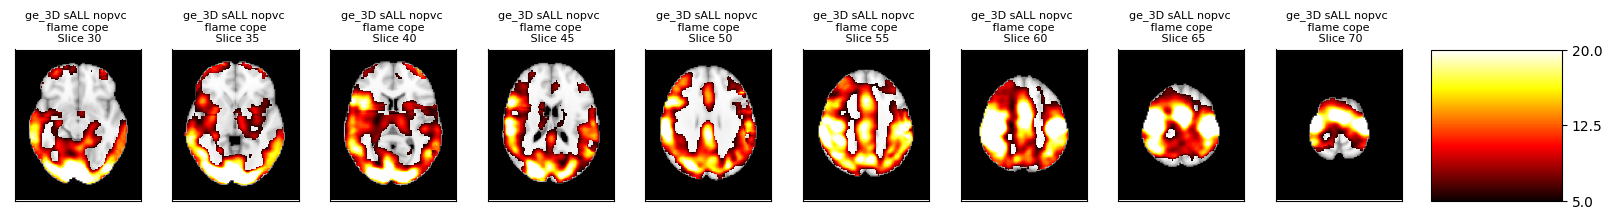

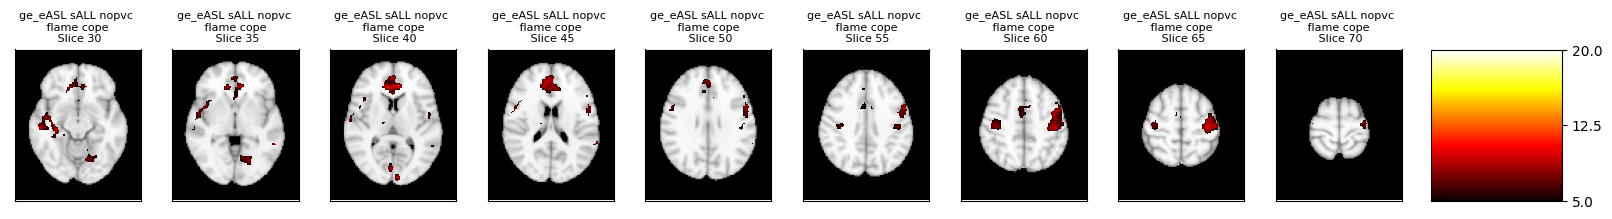

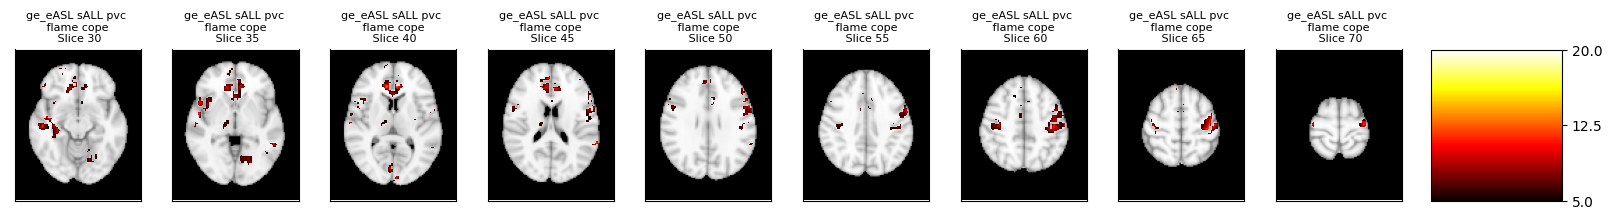

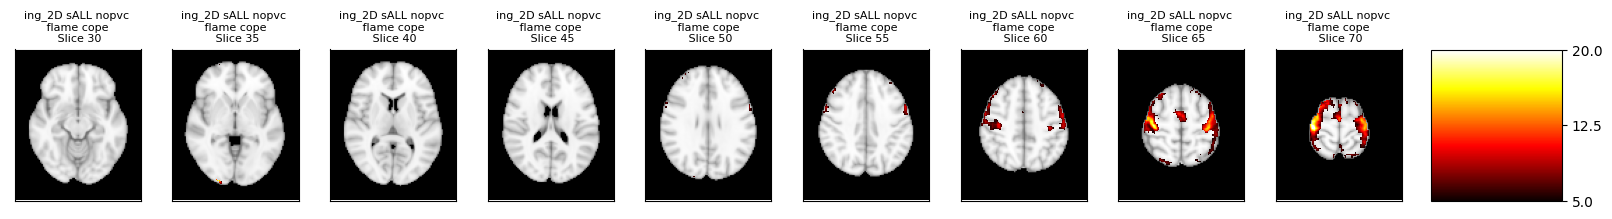

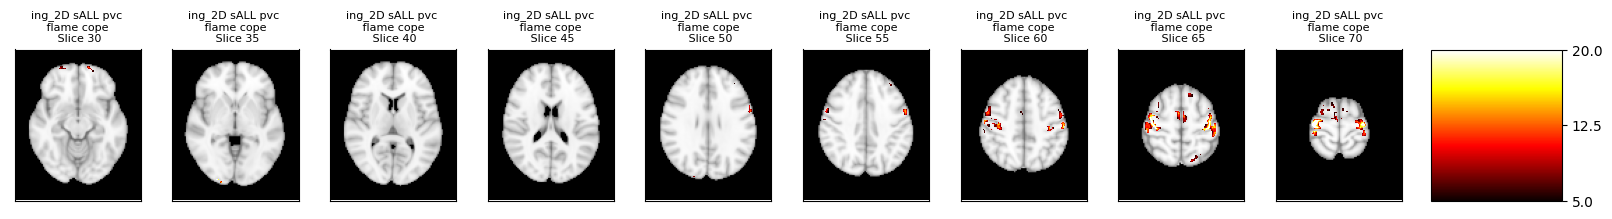

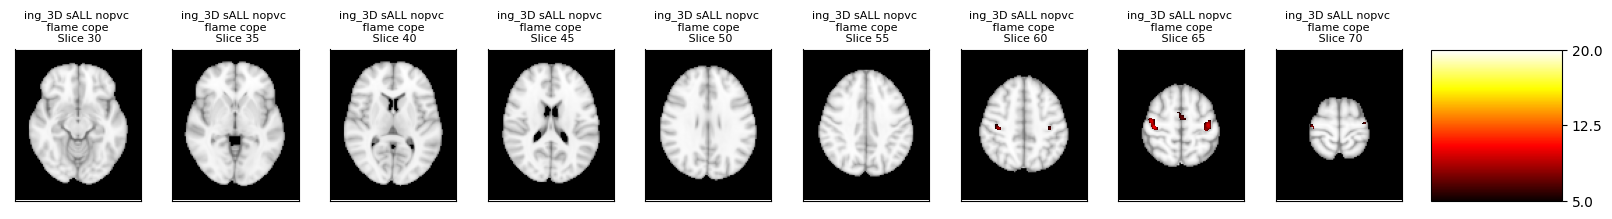

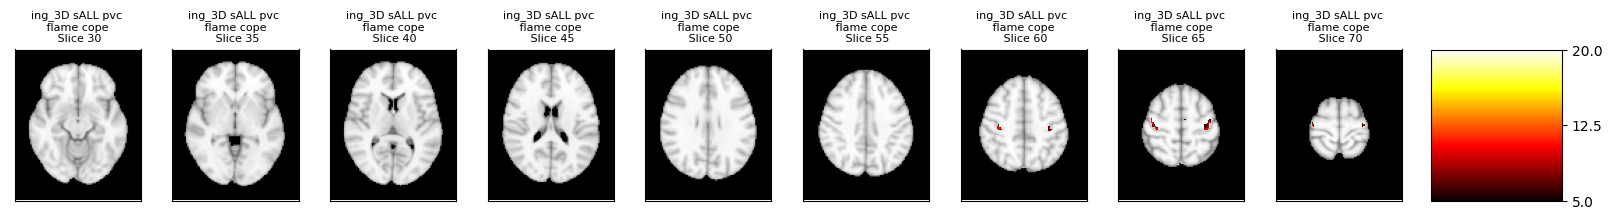

In [4]:
visualise_detectability(protocols=['GE-3D','GE-eASL','Ing-2D','Ing-3D'],sessions=['ALL'],flamezstaton=False,flamecopeon=True,randomisepon=False,randomisecorrpon=False)